In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
#from toolbox import wrappers
#from toolbox import network_utilities
import repos_tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import attila_utils
#import scipy.stats

GenRev not found, steiner wont work
Import error: Negex. Using keyword matching instead
Import error: Funcassociate. Make sure that funcassociate is in toolbox!


In [2]:
csva = '../../results/2021-09-02-asthma-drugs/proximity-results.csv'
csvb = '../../results/2021-08-04-guney-tools/proximity-results.csv'
prox = pd.concat([pd.read_csv(c, index_col=['condition', 'target']) for c in [csva, csvb]], axis=0)
# drop unneeded entities
prox = prox.drop('Guney', axis=0, level='condition').drop('HCQ t: TLRs', axis=0, level='target')
# rename AD gene sets
new_setnames = {'knowledge': 'knowledge', 'knowledge-TWAS2plus': 'knowledge TWAS2+', 'knowledge-TWAS2plus-IAPS': 'knowledge TWAS2+ IAPS', 'knowledge-TWAS': 'knowledge TWAS'}
# reorder rows
prox = prox.rename(new_setnames, axis=0, level=0)
target = ['3 AD genes', 'HCQ targets', 'ADRB2', 'CYSLTR1', 'GRIN3A', 'IL6R', 'NR3C1', 'PDE4D']
prox = prox.reindex(pd.MultiIndex.from_product([new_setnames.values(), target]))
# for repos_tools.plot_proximity_results
prox['condition'] = prox.index.get_level_values(level=0)
prox['target'] = prox.index.get_level_values(level=1)
prox

d         z    mean_0     std_0  \
knowledge             3 AD genes   0.000000 -8.115661  1.947667  0.239989   
                      HCQ targets  2.333333  1.587721  1.990667  0.215823   
                      ADRB2        2.000000  1.682682  1.261000  0.439180   
                      CYSLTR1      4.000000  2.976754  2.368000  0.548248   
                      GRIN3A       2.000000  0.031155  1.992000  0.256780   
                      IL6R         1.000000 -3.185085  1.926000  0.290730   
                      NR3C1        1.000000 -0.591209  1.259000  0.438086   
                      PDE4D        1.000000 -1.814344  1.767000  0.422742   
knowledge TWAS2+      3 AD genes   0.000000 -7.743683  1.902333  0.245663   
                      HCQ targets  2.000000  0.218769  1.952000  0.219409   
                      ADRB2        2.000000  2.098906  1.185000  0.388298   
                      CYSLTR1      4.000000  3.123908  2.343000  0.530425   
                      GRIN3A       2.000000  0.152656  1.953000  0.307881   
                      IL6R         1.000000 -3.087178  1.911000  0.295092   
                      NR3C1        1.000000 -0.496873  1.198000  0.398492   
                      PDE4D        1.000000 -1.665408  1.735000  0.441333   
knowledge TWAS2+ IAPS 3 AD genes   0.000000 -7.115839  1.793667  0.252067   
                      HCQ targets  2.000000  0.607272  1.851667  0.244262   
                      ADRB2        1.000000 -0.284747  1.075000  0.263391   
                      CYSLTR1      3.000000  1.484833  2.248000  0.506454   
                      GRIN3A       2.000000  0.343032  1.869000  0.381889   
                      IL6R         1.000000 -2.233388  1.833000  0.372976   
                      NR3C1        1.000000 -0.263664  1.065000  0.246526   
                      PDE4D        1.000000 -1.109014  1.569000  0.513068   
knowledge TWAS        3 AD genes   0.000000 -7.056524  1.831000  0.259476   
                      HCQ targets  2.000000  0.486653  1.885333  0.235623   
                      ADRB2        2.000000  3.086473  1.095000  0.293215   
                      CYSLTR1      3.000000  1.313492  2.276000  0.551202   
                      GRIN3A       2.000000  0.285175  1.907000  0.326115   
                      IL6R         1.000000 -2.479231  1.868000  0.350109   
                      NR3C1        1.000000 -0.292876  1.079000  0.269739   
                      PDE4D        1.000000 -1.336232  1.641000  0.479707   

                                              p              condition  \
knowledge             3 AD genes   2.415732e-16              knowledge   
                      HCQ targets  9.438253e-01              knowledge   
                      ADRB2        9.537816e-01              knowledge   
                      CYSLTR1      9.985434e-01              knowledge   
                      GRIN3A       5.124271e-01              knowledge   
                      IL6R         7.235586e-04              knowledge   
                      NR3C1        2.771903e-01              knowledge   
                      PDE4D        3.481236e-02              knowledge   
knowledge TWAS2+      3 AD genes   4.828871e-15       knowledge TWAS2+   
                      HCQ targets  5.865851e-01       knowledge TWAS2+   
                      ADRB2        9.820874e-01       knowledge TWAS2+   
                      CYSLTR1      9.991077e-01       knowledge TWAS2+   
                      GRIN3A       5.606653e-01       knowledge TWAS2+   
                      IL6R         1.010333e-03       knowledge TWAS2+   
                      NR3C1        3.096393e-01       knowledge TWAS2+   
                      PDE4D        4.791566e-02       knowledge TWAS2+   
knowledge TWAS2+ IAPS 3 AD genes   5.561709e-13  knowledge TWAS2+ IAPS   
                      HCQ targets  7.281647e-01  knowledge TWAS2+ IAPS   
                      ADRB2        3.879188e-01  knowledge TWAS2+ IAPS   
                    

## Sensitivity to input AD gene set
### Graphs

['named-figure/proximity-knowledge.png',
 'named-figure/proximity-knowledge.pdf']

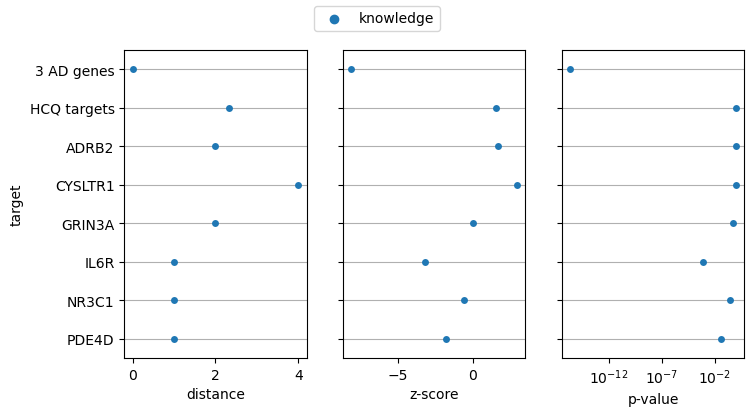

In [3]:
fig, ax = repos_tools.plot_proximity_results(prox.xs('knowledge', axis=0, level=0), jitter=False)
attila_utils.savefig(fig, 'proximity-knowledge')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_52463/2586913422.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(l)


['named-figure/proximity-knowledge-v2.png',
 'named-figure/proximity-knowledge-v2.pdf']

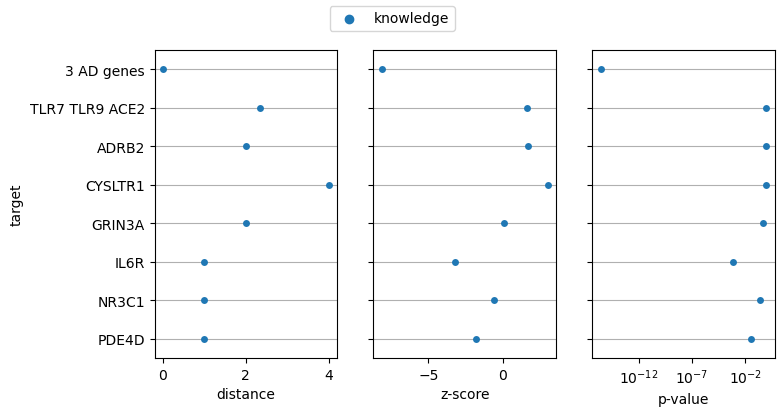

In [4]:
def replace_yaxislabel(ax, label_ix=1, new_label='this or that'):
    l = [x.get_text() for x in ax.get_yticklabels()]
    l[label_ix] = new_label
    ax.set_yticklabels(l)
    return(ax)

fig, ax = repos_tools.plot_proximity_results(prox.xs('knowledge', axis=0, level=0), jitter=False)
replace_yaxislabel(ax[0], label_ix=1, new_label='TLR7 TLR9 ACE2')
attila_utils.savefig(fig, 'proximity-knowledge-v2')

['named-figure/proximity-knowledge-TWAS2plus-IAPS.png',
 'named-figure/proximity-knowledge-TWAS2plus-IAPS.pdf']

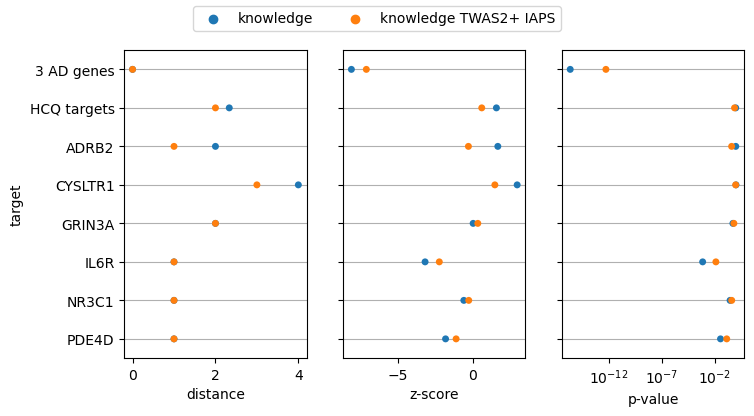

In [5]:
fig, ax = repos_tools.plot_proximity_results(prox.drop(['knowledge TWAS2+', 'knowledge TWAS'], axis=0, level=0), jitter=False)
attila_utils.savefig(fig, 'proximity-knowledge-TWAS2plus-IAPS')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_52463/2586913422.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(l)


['named-figure/proximity-knowledge-TWAS2plus-IAPS-v2.png',
 'named-figure/proximity-knowledge-TWAS2plus-IAPS-v2.pdf']

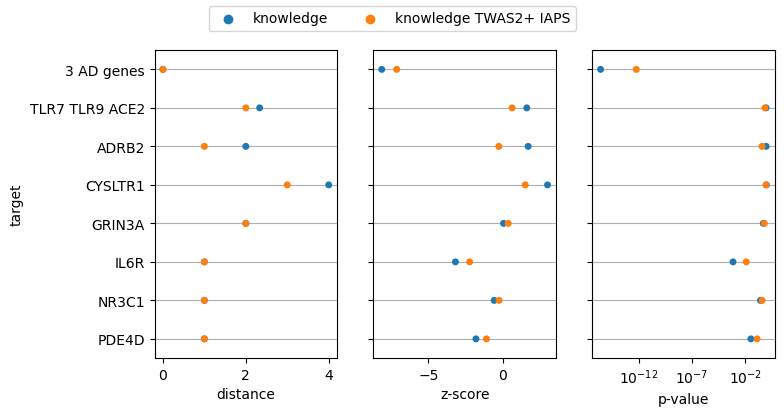

In [6]:
fig, ax = repos_tools.plot_proximity_results(prox.drop(['knowledge TWAS2+', 'knowledge TWAS'], axis=0, level=0), jitter=False)
replace_yaxislabel(ax[0], label_ix=1, new_label='TLR7 TLR9 ACE2')
attila_utils.savefig(fig, 'proximity-knowledge-TWAS2plus-IAPS-v2')

['named-figure/proximity-all.png', 'named-figure/proximity-all.pdf']

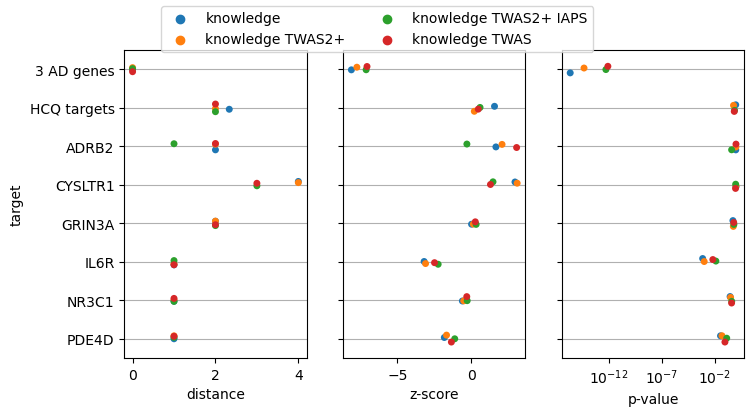

In [7]:
fig, ax = repos_tools.plot_proximity_results(prox)
attila_utils.savefig(fig, 'proximity-all')

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_52463/2586913422.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(l)


['named-figure/proximity-all-v2.png', 'named-figure/proximity-all-v2.pdf']

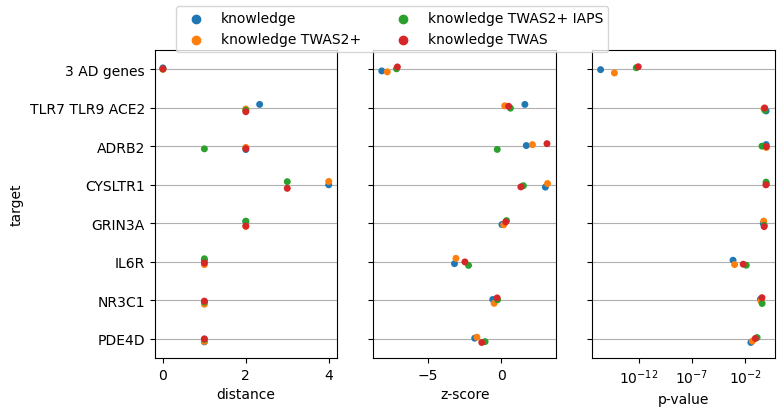

In [8]:
fig, ax = repos_tools.plot_proximity_results(prox)
replace_yaxislabel(ax[0], label_ix=1, new_label='TLR7 TLR9 ACE2')
attila_utils.savefig(fig, 'proximity-all-v2')

### Quantifying impact of input AD gene set

Here I use root mean square deviation (RMSD) of $d_x$ from $d_\mathrm{knowledge}$ and $z_\mathrm{knowledge}$, where $x \in \{\text{knowledge TWAS2+}, \text{knowledge TWAS}, \text{knowledge TWAS2+ IAPS}\}$.  RMSD is defined as
$$
\sqrt{\sum (d_x - d_\mathrm{knowledge})^2}
$$

In [9]:
def my_rms(prox, values='d'):
    df = prox.pivot(index='target', columns='condition', values=values)
    s = df.apply(lambda x: (x - df.knowledge) ** 2, axis=0).sum(axis=0)
    s = s.apply(lambda x: np.sqrt(x))
    return(s)

d = {y: my_rms(prox, values=y) for y in list('dz')}
rms = pd.DataFrame(d, index=d['d'].index)

def get_setsize(setname='knowledge'):
    fpath = '../../results/2021-07-01-high-conf-ADgenes/AD-genes-' + setname
    with open(fpath) as f:
        l = f.readlines()
    return(len(l))

rms = rms.reindex(new_setnames.values())
rms['n_genes'] = [get_setsize(y) for y in new_setnames.keys()]
rms = rms.reindex(['n_genes', 'd', 'z'], axis=1)
rms

,n_genes,d,z
condition,,,
knowledge,26,0.000000,0.000000
knowledge TWAS2+,69,0.333333,1.504235
knowledge TWAS2+ IAPS,94,1.452966,3.108907
knowledge TWAS,151,1.054093,2.819848


['named-figure/rmsd-barchart.png', 'named-figure/rmsd-barchart.pdf']

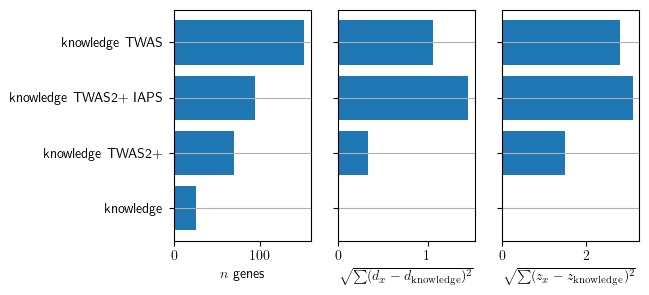

In [10]:
matplotlib.rcParams['text.usetex'] = True
fig, ax = plt.subplots(1, 3, figsize=(6, 3), sharey=True)
for var, axi in zip(rms.columns, ax):
    axi.barh(np.arange(len(rms)), rms[var], tick_label=rms.index)
    axi.grid(True, axis='y')

ax[0].set_xlabel(r'$n$ genes')
ax[1].set_xlabel(r'$\sqrt{\sum (d_x - d_\mathrm{knowledge})^2}$')
ax[2].set_xlabel(r'$\sqrt{\sum (z_x - z_\mathrm{knowledge})^2}$')
attila_utils.savefig(fig, 'rmsd-barchart')

In [11]:
%connect_info

{
  "shell_port": 60824,
  "iopub_port": 60825,
  "stdin_port": 60826,
  "control_port": 60828,
  "hb_port": 60827,
  "ip": "127.0.0.1",
  "key": "a1a2a871-e50011574a713642f892b9d3",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d2e920d9-4fbc-4823-b9d5-69a2d78a74ed.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
